In [1]:
from __future__ import division
import numpy as np
import grad
import pyfits
import matplotlib.pyplot as plt
%matplotlib inline
import plotc
import read_params

In [2]:
Rsun=695.8
Lx = read_params.get_xlength()
nx = read_params.get_nx()
x = np.linspace(-Lx/2,Lx/2,nx,endpoint=False)
z= np.loadtxt(read_params.get_solarmodel(),usecols=[0]); z=(z-1)*Rsun

def ind_x(xcoord): return int((xcoord/Lx+0.5)*nx)
def ind_z(zcoord): return int(abs(z-zcoord).argmin())

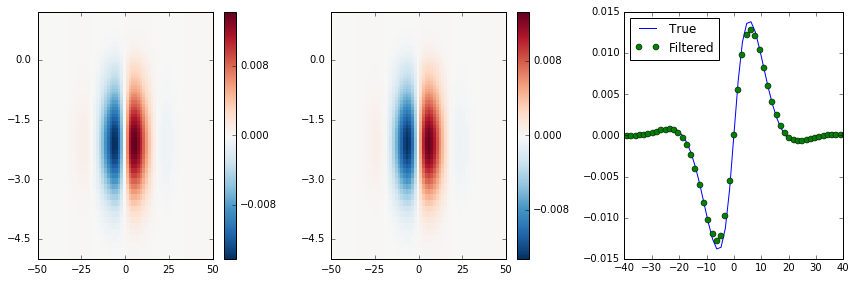

In [4]:
true_psi = pyfits.getdata('true_psi.fits').transpose(2,1,0)

gl = plotc.gridlist(1,3)
plotc.colorplot(true_psi,x=x,y=z,xr=[-50,50],yr=[-5,None],centerzero=True,sp=next(gl));

true_psi_filtered = grad.filterx(true_psi,70)
plotc.colorplot(true_psi_filtered,x=x,y=z,xr=[-50,50],yr=[-5,None],centerzero=True,sp=next(gl));

plt.subplot(next(gl))
plt.plot(x,true_psi[:,0,ind_z(-2.3)],label="True")
plt.plot(x,true_psi_filtered[:,0,ind_z(-2.3)],marker="o",ls="None",label="Filtered")
plt.xlim(-40,40)
plt.legend(loc="best")

plt.gcf().set_size_inches(12,4);
plt.tight_layout()